In [1]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

c:\Users\beatr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# function to load the simulation data from the json file
def load_config(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

In [3]:
config = load_config('simulation_data.json')

# Convert the json file data into a pandas DataFrame
df = pd.DataFrame(config)
df.head()



,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [4]:
# The following plot shows the waiting times for all the festival goers for each number of servers in the system

df_melted = pd.melt(df, value_name="Waiting Time", ignore_index=False)
# sns.scatterplot(data=df_melted, x=df_melted.index, y="Waiting Time")
df.index = df.index + 1 # this switches the x-axis labels to strat from 1 instead of 0



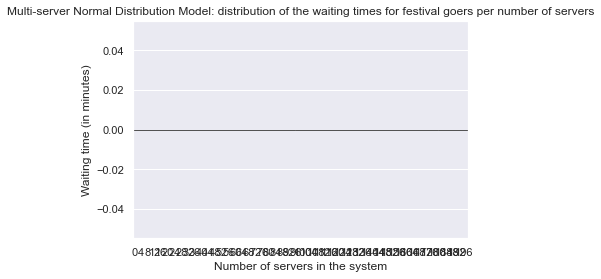

In [5]:
ax = sns.boxplot(data=df_melted, x=df_melted.index, y="Waiting Time", color="#c94c4c",  flierprops=dict( marker='o', markersize=4, markerfacecolor="#eea29a"))


xticks_interval = 4
labels = ax.get_xticks()[::xticks_interval] 
ax.set_xticks(labels)

plt.title("Multi-server Normal Distribution Model: distribution of the waiting times for festival goers per number of servers")
#plt.title("Distribution of Waiting Times for Festival Goers Generated by the Normal Distribution Model")
plt.xlabel("Number of servers in the system")
plt.ylabel("Waiting time (in minutes)")
plt.show()

<Figure size 720x432 with 0 Axes>

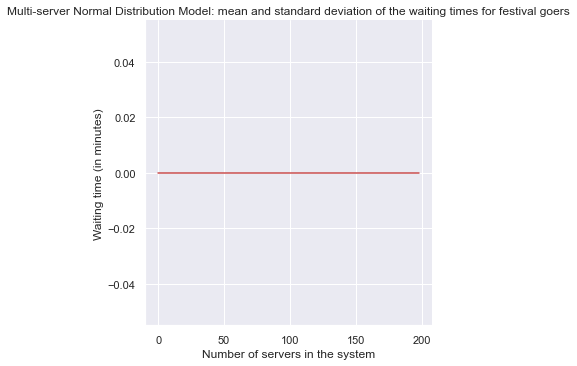

In [6]:
plt.figure(figsize=(10, 6))
sns.relplot(x=df_melted.index, y="Waiting Time", 
             data=df_melted, kind="line", errorbar="sd", color="#c94c4c") #color="#034f84") HOW MANY STANDARD DEVIATIONS -> ONE FROM THE MEAN

plt.title("Multi-server Normal Distribution Model: mean and standard deviation of the waiting times for festival goers")
#plt.title("Distribution of Waiting Times for Festival Goers generated by the Normal Distribution Model")
plt.xlabel("Number of servers in the system")
plt.ylabel("Waiting time (in minutes)")
plt.show()

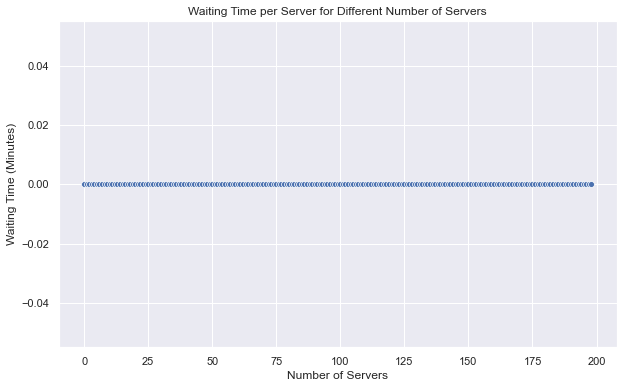

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_melted.index, y='Waiting Time', data=df_melted, marker='o', errorbar="sd")
plt.title("Waiting Time per Server for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time (Minutes)")
plt.show()

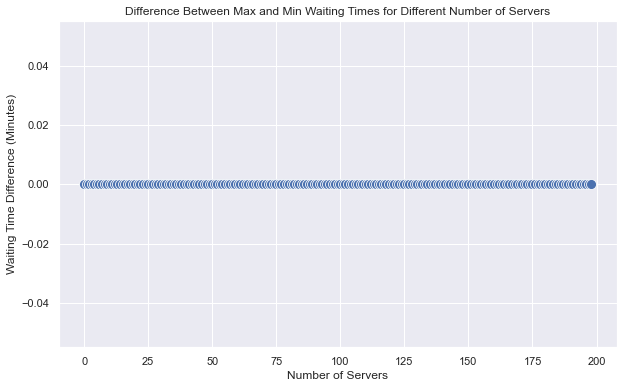

In [8]:
waiting_time_diff = df_melted.max(axis=1) - df_melted.min(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_melted.index, y=waiting_time_diff, s=100)
#sns.scatterplot(x=range(1, len(waiting_time_diff)+1), y=waiting_time_diff, color='skyblue', s=100)
plt.title("Difference Between Max and Min Waiting Times for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time Difference (Minutes)")
#plt.xticks(range(1, len(waiting_time_diff)+1))  # Set x-axis ticks to actual number of servers
plt.show()